In [1]:
import sys
sys.path.append('/home/npopkov/dll24')

from models.ddpm.DDPMBase import DDPMBase
from models.ddpm.oneDCAUnet import oneDCAUnet
import matplotlib.pyplot as plt
import torch 
import numpy as np

In [2]:
n_steps, betaMin, betaMax = 1000, 10**-5, 0.004

network = oneDCAUnet(n_steps=n_steps,c_in=1,c_out=1).to('cuda')
ddpm = DDPMBase(n_steps=n_steps,network=network,betaMin=betaMin,betaMax=betaMax).to('cuda')

In [3]:
x = torch.arange(0,2*torch.pi,0.25)
sin = torch.sin(x)
cos = torch.cos(x)
tan = sin-cos
data = torch.stack([sin,cos,tan],dim=1).permute(1,0).unsqueeze(0).to('cuda')
print(data.shape)

torch.Size([1, 3, 26])


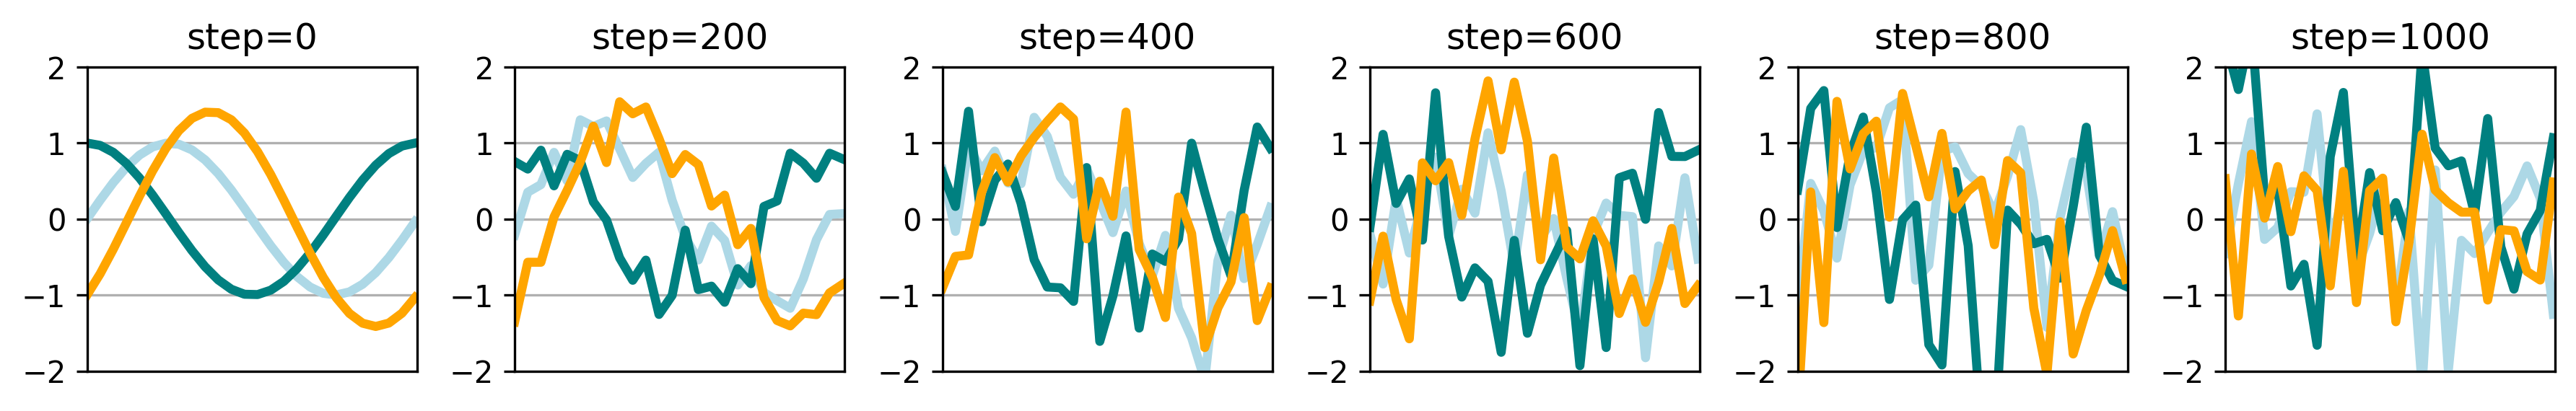

In [17]:
fig,ax = plt.subplots(1,6,figsize=(6*2,1*2),dpi=300)   

ax[0].plot(x,data.squeeze()[0].cpu(),linewidth=3,color='lightblue')
ax[0].plot(x,data.squeeze()[1].cpu(),linewidth=3,color='teal')
ax[0].plot(x,data.squeeze()[2].cpu(),linewidth=3,color='orange')
ax[0].set_title('step=0')
ax[0].set_ylim(-2,2)
ax[0].set_xlim(0,2*np.pi)
ax[0].xaxis.set_visible(False)
ax[0].grid()
#ax[0].axis('off')
for i in range(1,6):

    noise = torch.randn_like(data).to('cuda')
    noised_data = ddpm.addNoise(data,torch.tensor([200*i-1]).to('cuda'),noise)
    ax[i].plot(x,noised_data.squeeze()[0].cpu(),linewidth=3,color='lightblue')
    ax[i].plot(x,noised_data.squeeze()[1].cpu(),linewidth=3,color='teal')
    ax[i].plot(x,noised_data.squeeze()[2].cpu(),linewidth=3,color='orange')
    ax[i].set_title(f'step={200*i}')
    ax[i].set_ylim(-2,2)
    ax[i].set_xlim(0,2*np.pi)
    ax[i].xaxis.set_visible(False)
    ax[i].grid()
    #ax[i].axis('off')

plt.tight_layout()
plt.show()